In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
url1 = "https://www.cars24.com/buy-used-car/?sort=P&page="
url2="&storeCityId=3686&pinId=500001"

In [3]:
urls = []
name = []
year = []
model = []
type_am = []
km_travel = []
owner = []
type1 = []
payment = []
original_price = []
after_discount = []
diff = []
emi = []

In [4]:
original_price = []

for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.text,'html.parser')
    
    car_original = soup.findAll('div',{'class':'JvSRy'})
    for car7 in car_original:
        pattern = re.findall(r'\d+\,\d+$',car7.text)
        if pattern == []:
            original_price.append(np.nan)
        else:
            original_price.append(int(pattern[0].replace(',','')))


In [5]:
urls = []
name = []
year = []
model = []
type_am = []
km_travel = []
owner = []
type1 = []
payment = []
original_price = []
after_discount = []
diff = []
emi = []

for i in range(1,19):
    url=url1+str(i)+url2
    #cars_text = soup.findAll('div',{"class":"_1l4fi"})
    urls.append(url)
#URLs has been taken

for url in urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.text,'html.parser')
    
# 1. Name of the Car
# 2. Year

    car_name = soup.findAll('h2',{'class':'_3FpCg'})
    name1 = [dis.text for dis in car_name]
    for car1 in name1:
        pattern = re.compile('\d{4}')
        match1 = pattern.split(car1)
        name.append(match1[1].strip())
        pattern = re.compile('\d{4}')
        match2 = pattern.findall(car1)
        year.append(int(match2[0]))
        
        
# 3. Model of the car
# 4. Type Manual or Automatic

    car_model = soup.findAll('p',{'class':'cvakB'})
    model1 = [dis.text for dis in car_model]
    for car2 in model1:
        pattern = re.compile('\w+$')
        match1 = pattern.split(car2)
        model.append(match1[0].strip())
        
        pattern = re.compile('\w+$')
        match2 = pattern.findall(car2)
        if match2 == []:
            type_am.append(np.nan)
        else:
            type_am.append(match2[0])


# 5. KM travelled
# 6. No. of Owners
# 7. Type of Engine

    car_km1 = soup.findAll('ul',{'class':'bVR0c'}) 
    for car4 in car_km1:
        car_km = car4.findAll('li')
        km_travel.append(int((car_km[0].text[:-2]).replace(',','')))
        car_km = car4.findAll('li')
        owner.append(int(car_km[1].text[0]))
        car_km = car4.findAll('li')
        type1.append(car_km[-1].text)


# 8. Original price of car

    car_original = soup.findAll('div',{'class':'JvSRy'})
    for car7 in car_original:
        pattern = re.findall(r'\d+\,\d+$',car7.text)
        if pattern == []:
            original_price.append(np.nan)
        else:
            original_price.append(int(pattern[0].replace(',','')))
        
        
# 9. After removing

    car_less = soup.findAll('div',{'class':'_7udZZ'})
    for car8 in car_less:
        after_discount.append(int((car8.text[1:]).replace(',','')))
        
        
# 10. Difference amount of original and discount price

    car_discount = soup.findAll('div',{'class':'align-self-center _2RowP'})
    for dis in car_discount:
        pattern = re.findall(r'\d+',dis.text)
        if pattern == []:
            diff.append(np.nan)
        else:
            diff.append(int(''.join(pattern)))

# 11. EMI

    car_emi = soup.findAll('strong')
    for car9 in car_emi:
        pattern = re.findall('\d+',car9.text)
        emi.append(int(''.join(pattern)))
        
        
# 12. Downpayment

    payment1 = soup.findAll('span',{'class':'_3X7mV _2H07I'})
    downpayment1 = [car.text for car in payment1]
    for pay in downpayment1:
        pay1 = re.findall('\w{4}',pay)
        payment.append(pay1[0])  

In [6]:
print(len(name))
print(len(year))
print(len(model))
print(len(type_am))
print(len(km_travel))
print(len(owner))
print(len(type1))
print(len(original_price))
print(len(after_discount))
print(len(diff))
print(len(emi))
print(len(payment))

53
53
53
53
53
53
53
53
53
53
53
53


In [7]:
car_information = {'Name':name,'Year':year,'Model':model,'Type':type_am,'KM Travelled':km_travel,'No.of owners':owner,'Type of Engine':type1,'Price':original_price,'After Discount Price':after_discount,'Discount':diff,'EMI':emi,'Down payment':payment}

In [8]:
car_information_df = pd.DataFrame(car_information)
car_information_df.head()

,Name,Year,Model,Type,KM Travelled,No.of owners,Type of Engine,Price,After Discount Price,Discount,EMI,Down payment
0,Mercedes Benz C Class,2009,220 CDI ELEGANCE AT,Automatic,65969,2,Diesel,943399.0,895399,48000.0,19918,Zero
1,Volkswagen Polo,2019,Trendline 1.0 L Petrol,Manual,51864,2,Petrol,576799.0,547799,29000.0,12185,Zero
2,Ford New Figo,2017,1.2 TITANIUM,Manual,38790,1,Petrol,532299.0,500299,32000.0,11129,Zero
3,Hyundai Elite i20,2016,Sportz 1.2 VTVT MT,NaN,24365,1,Petrol,651599.0,611599,40000.0,13605,Zero
4,Hyundai GRAND I10 NIOS,2019,Asta Petrol,Manual,33518,1,Petrol,660899.0,655899,5000.0,14590,Zero


In [13]:
# car_information_df.to_csv("data.csv")

In [14]:
car_information_df.isnull().sum()

Name                    0
Year                    0
Model                   0
Type                    2
KM Travelled            0
No.of owners            0
Type of Engine          0
Price                   1
After Discount Price    0
Discount                1
EMI                     0
Down payment            0
dtype: int64

In [15]:
car_information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  53 non-null     object 
 1   Year                  53 non-null     int64  
 2   Model                 53 non-null     object 
 3   Type                  51 non-null     object 
 4   KM Travelled          53 non-null     int64  
 5   No.of owners          53 non-null     int64  
 6   Type of Engine        53 non-null     object 
 7   Price                 52 non-null     float64
 8   After Discount Price  53 non-null     int64  
 9   Discount              52 non-null     float64
 10  EMI                   53 non-null     int64  
 11  Down payment          53 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.1+ KB


In [16]:
car_information_df['Price'].fillna(method = "pad",inplace=True)

In [17]:
car_information_df.isnull().sum()

Name                    0
Year                    0
Model                   0
Type                    2
KM Travelled            0
No.of owners            0
Type of Engine          0
Price                   0
After Discount Price    0
Discount                1
EMI                     0
Down payment            0
dtype: int64

In [18]:
car_information_df['Price'].describe()

count        53.000000
mean     566659.377358
std      186639.733526
min      255499.000000
25%      439199.000000
50%      544799.000000
75%      676899.000000
max      999099.000000
Name: Price, dtype: float64

In [20]:
car_information_df.isnull().any()

Name                    False
Year                    False
Model                   False
Type                     True
KM Travelled            False
No.of owners            False
Type of Engine          False
Price                   False
After Discount Price    False
Discount                 True
EMI                     False
Down payment            False
dtype: bool

In [21]:
# Finding the null values in 'Type' (categorical values)
car_information_df.Type.isnull().sum()

2

In [22]:
# Filling the null values in 'Type' using mode
car_information_df.Type.fillna(car_information_df.Type.mode()[0],inplace=True)

In [23]:
# Checking weather it got replaced or not
car_information_df.isnull().sum()

Name                    0
Year                    0
Model                   0
Type                    0
KM Travelled            0
No.of owners            0
Type of Engine          0
Price                   0
After Discount Price    0
Discount                1
EMI                     0
Down payment            0
dtype: int64

In [24]:
car_information_df['Discount'].fillna(method = 'pad',inplace=True)

In [26]:
# Checking weather it got replaced or not
car_information_df.isnull().sum()

Name                    0
Year                    0
Model                   0
Type                    0
KM Travelled            0
No.of owners            0
Type of Engine          0
Price                   0
After Discount Price    0
Discount                0
EMI                     0
Down payment            0
dtype: int64

In [29]:
car_information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  53 non-null     object 
 1   Year                  53 non-null     int64  
 2   Model                 53 non-null     object 
 3   Type                  53 non-null     object 
 4   KM Travelled          53 non-null     int64  
 5   No.of owners          53 non-null     int64  
 6   Type of Engine        53 non-null     object 
 7   Price                 53 non-null     float64
 8   After Discount Price  53 non-null     int64  
 9   Discount              53 non-null     float64
 10  EMI                   53 non-null     int64  
 11  Down payment          53 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.1+ KB


In [30]:
car_information_df.to_csv('car_data.csv')

In [32]:
car_information_df.isnull().any()

Name                    False
Year                    False
Model                   False
Type                    False
KM Travelled            False
No.of owners            False
Type of Engine          False
Price                   False
After Discount Price    False
Discount                False
EMI                     False
Down payment            False
dtype: bool

In [33]:
car_information_df.shape

(53, 12)

In [38]:
car_information_df

,Name,Year,Model,Type,KM Travelled,No.of owners,Type of Engine,Price,After Discount Price,Discount,EMI,Down payment
0,Mercedes Benz C Class,2009,220 CDI ELEGANCE AT,Automatic,65969,2,Diesel,943399.0,895399,48000.0,19918,Zero
1,Volkswagen Polo,2019,Trendline 1.0 L Petrol,Manual,51864,2,Petrol,576799.0,547799,29000.0,12185,Zero
2,Ford New Figo,2017,1.2 TITANIUM,Manual,38790,1,Petrol,532299.0,500299,32000.0,11129,Zero
3,Hyundai Elite i20,2016,Sportz 1.2 VTVT MT,Manual,24365,1,Petrol,651599.0,611599,40000.0,13605,Zero
4,Hyundai GRAND I10 NIOS,2019,Asta Petrol,Manual,33518,1,Petrol,660899.0,655899,5000.0,14590,Zero
5,Hyundai i20 Active,2017,1.2 S,Manual,109519,1,Petrol,676899.0,633899,43000.0,14101,Zero
6,Hyundai Elite i20,2019,1.2 SPORTS PLUS VTVT,Manual,5355,2,Petrol,726099.0,707099,19000.0,15729,Zero
7,Skoda Octavia,2017,Style 1.4 TSI MT,Manual,47264,1,Petrol,544799.0,1533799,11000.0,34119,Zero
8,Hyundai Elite i20,2018,ASTA 1.2 AT,Manual,20001,1,Petrol,761899.0,752899,9000.0,16748,Zero
9,Maruti Baleno,2016,ZETA 1.2 K12,Manual,103172,1,Petrol,649799.0,604799,45000.0,13453,Zero


In [40]:
type(car_information_df)

pandas.core.frame.DataFrame

In [41]:
type(car_information_df['Model'])

pandas.core.series.Series

In [43]:
car_information_df.head()

,Name,Year,Model,Type,KM Travelled,No.of owners,Type of Engine,Price,After Discount Price,Discount,EMI,Down payment
0,Mercedes Benz C Class,2009,220 CDI ELEGANCE AT,Automatic,65969,2,Diesel,943399.0,895399,48000.0,19918,Zero
1,Volkswagen Polo,2019,Trendline 1.0 L Petrol,Manual,51864,2,Petrol,576799.0,547799,29000.0,12185,Zero
2,Ford New Figo,2017,1.2 TITANIUM,Manual,38790,1,Petrol,532299.0,500299,32000.0,11129,Zero
3,Hyundai Elite i20,2016,Sportz 1.2 VTVT MT,Manual,24365,1,Petrol,651599.0,611599,40000.0,13605,Zero
4,Hyundai GRAND I10 NIOS,2019,Asta Petrol,Manual,33518,1,Petrol,660899.0,655899,5000.0,14590,Zero


In [44]:
car_information_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  53 non-null     object 
 1   Year                  53 non-null     int64  
 2   Model                 53 non-null     object 
 3   Type                  53 non-null     object 
 4   KM Travelled          53 non-null     int64  
 5   No.of owners          53 non-null     int64  
 6   Type of Engine        53 non-null     object 
 7   Price                 53 non-null     float64
 8   After Discount Price  53 non-null     int64  
 9   Discount              53 non-null     float64
 10  EMI                   53 non-null     int64  
 11  Down payment          53 non-null     object 
dtypes: float64(2), int64(5), object(5)
memory usage: 5.1+ KB


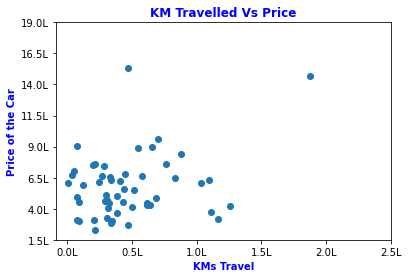

In [48]:
plt.scatter(np.array(km_travel),np.array(after_discount))

# x-axis
label = np.arange(0,300000,50000)
ticks = ['{}L'.format(i/100000) for i in label]
plt.xticks(label,ticks)
# plt.xticks(rotation=45)
plt.xlabel('KMs Travel',fontdict = {'fontsize':10,'fontweight':'bold','color':'blue'})

# y-axis
label1 = np.arange(150000,2000000,250000)
ticks1 = ['{}L'.format(i/100000) for i in label1]
plt.yticks(label1,ticks1)
plt.ylabel('Price of the Car',fontdict = {'fontsize':10,'fontweight':'bold','color':'blue'})


# title of graph

plt.title('KM Travelled Vs Price',fontdict = {'fontsize':12,'fontweight':'bold','color':'blue'})
plt.show()
#more km travel, less price it will sell

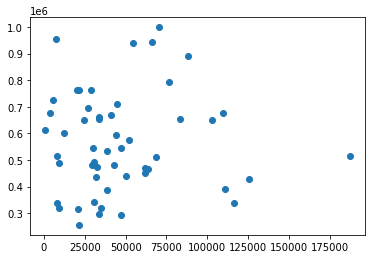

In [49]:
plt.scatter(np.array(km_travel),np.array(original_price))
plt.show()

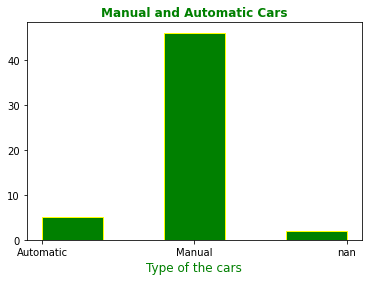

In [50]:
# Histogram
plt.hist(np.array(type_am),bins=5,color='Green',edgecolor='yellow')
plt.title('Manual and Automatic Cars',fontdict={'color':'green','fontweight':'bold','fontsize':12})
plt.xlabel('Type of the cars',fontdict={'fontsize':12,'color':'green'})
plt.show()

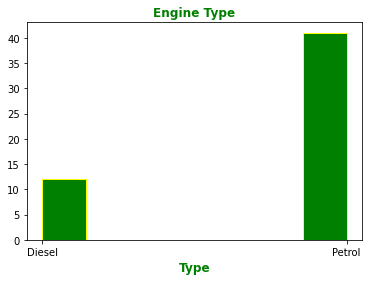

In [51]:
# Histogram
plt.hist(np.array(type1),bins=7,color='Green',edgecolor='yellow')
plt.title('Engine Type',fontdict={'color':'green','fontweight':'bold','fontsize':12})
plt.xlabel('Type',fontdict={'fontsize':12,'fontweight':'bold','color':'green'})
plt.show()

In [52]:
car_information_df = pd.read_csv('car_data.csv',index_col=0)

In [53]:
cars_dict = {}
for i in car_information_df['Name']:
    if i in cars_dict:
        cars_dict[i]+=1
    else:
        cars_dict[i]=1
print(cars_dict)
len(cars_dict)

{'Mercedes Benz C Class': 1, 'Volkswagen Polo': 2, 'Ford New Figo': 1, 'Hyundai Elite i20': 5, 'Hyundai GRAND I10 NIOS': 1, 'Hyundai i20 Active': 2, 'Skoda Octavia': 1, 'Maruti Baleno': 3, 'Renault Kwid': 1, 'Maruti S PRESSO': 1, 'Maruti Vitara Brezza': 3, 'Hyundai Grand i10': 3, 'Maruti Alto': 1, 'Maruti Eeco': 1, 'Maruti Alto 800': 6, 'Hyundai i20': 1, 'Honda Brio': 1, 'Maruti Swift': 3, 'Maruti Alto K10': 1, 'Toyota Innova Crysta': 1, 'Maruti Dzire': 4, 'Ford Ecosport': 2, 'Maruti Swift Dzire': 1, 'Maruti Ritz': 1, 'Maruti Celerio': 2, 'Maruti Ertiga': 1, 'Hyundai Verna': 1, 'Hyundai Creta': 1, 'Hyundai NEW SANTRO': 1}


29

In [54]:
car_information_df[car_information_df['Name'] == 'Hyundai Creta']

,Name,Year,Model,Type,KM Travelled,No.of owners,Type of Engine,Price,After Discount Price,Discount,EMI,Down payment
49,Hyundai Creta,2016,1.6 SX CRDI,Manual,70446,1,Diesel,999099.0,959099,40000.0,21335,Zero


In [55]:
car_information_df

,Name,Year,Model,Type,KM Travelled,No.of owners,Type of Engine,Price,After Discount Price,Discount,EMI,Down payment
0,Mercedes Benz C Class,2009,220 CDI ELEGANCE AT,Automatic,65969,2,Diesel,943399.0,895399,48000.0,19918,Zero
1,Volkswagen Polo,2019,Trendline 1.0 L Petrol,Manual,51864,2,Petrol,576799.0,547799,29000.0,12185,Zero
2,Ford New Figo,2017,1.2 TITANIUM,Manual,38790,1,Petrol,532299.0,500299,32000.0,11129,Zero
3,Hyundai Elite i20,2016,Sportz 1.2 VTVT MT,Manual,24365,1,Petrol,651599.0,611599,40000.0,13605,Zero
4,Hyundai GRAND I10 NIOS,2019,Asta Petrol,Manual,33518,1,Petrol,660899.0,655899,5000.0,14590,Zero
5,Hyundai i20 Active,2017,1.2 S,Manual,109519,1,Petrol,676899.0,633899,43000.0,14101,Zero
6,Hyundai Elite i20,2019,1.2 SPORTS PLUS VTVT,Manual,5355,2,Petrol,726099.0,707099,19000.0,15729,Zero
7,Skoda Octavia,2017,Style 1.4 TSI MT,Manual,47264,1,Petrol,544799.0,1533799,11000.0,34119,Zero
8,Hyundai Elite i20,2018,ASTA 1.2 AT,Manual,20001,1,Petrol,761899.0,752899,9000.0,16748,Zero
9,Maruti Baleno,2016,ZETA 1.2 K12,Manual,103172,1,Petrol,649799.0,604799,45000.0,13453,Zero
